# Vocabulary Analysis Workshop

## Stemming and Lemmatization

There are more meaningful words visible in the word clouds, but it would be good to do some normalization.

Let's do the following
1. Get rid of the punctuation
2. Treat "Experience" and "experience" as the same term
3. Treat "service" and "services" as the same term

The first two are easy, but the third is complicated. The process of combining "service" and "services", or "requires" and "requirement" is achieved by stemming or lemmatization. These process work by either removing suffixes or by looking up "simpler" forms respectively.

There are two kinds of suffixes that we will consider removing.

1. Inflectional: "cat**s**", "call**ing**", "quick**est**"
2. Derivational: "real**ize**", "hope**less**", "require**ment**"

Stemming and lemmatization (sometimes called Soft Stemming) are text marking processes that mark segments (almost always tokens) with canonical or reduced forms. In natural language processing (NLP) it is generally used to combine words with common lemmas or stems when the meaning of the inflection or derivation is not important to the problem at hand.

The two techniques differ in what kind of word is returned, as well as implementation. A stem is not necessarily a "word", it can be part of a word like "includ" for "include" and "including". A lemma is the head-word of a dictionary entry. In English, stemming is usually implemented with a sequence of transformation rules, and lemmatization is implemented with a mapping from word to lemma.

(Stemming [wikipedia](https://en.wikipedia.org/wiki/Stemming))  
(Lemmatisation [wikipedia](https://en.wikipedia.org/wiki/Lemmatisation))  
(Snowball [wikipedia](http://snowballstem.org/))

In [1]:
from __future__ import division, print_function

%matplotlib inline

import codecs
import nltk
import pandas as pd
import pickle

from vocab_analysis import *

import answers

In [2]:
jobs_df = pd.read_pickle('./data/tokenized.pickle')

In [3]:
jobs_df.head()

,description,experience,education,is_hourly,is_part_time,is_supervisor,tokens
id,,,,,,,
0,THE COMPANY Employer is a midstream service...,5+,none,False,False,True,"[THE, COMPANY, Employer, is, a, midstream, ser..."
1,ICR Staffing is now accepting resumes for Indu...,2-5,none,False,False,False,"[ICR, Staffing, is, now, accepting, resumes, f..."
2,This is a great position for the right person....,none,none,False,True,False,"[This, is, a, great, position, for, the, right..."
3,A large multi-specialty health center is expan...,none,none,False,False,False,"[A, large, multi, -, specialty, health, center..."
4,JOB PURPOSE: The Account Director is respon...,5+,bs-degree-needed,False,False,True,"[JOB, PURPOSE, :, The, Account, Director, is, ..."


In [4]:
with open('./data/segments.pickle') as fp:
    segments = pickle.load(fp)

The word-to-lemma mapping we have is from [Laurence Anthony](http://www.laurenceanthony.net/).

In [5]:
english_dictionary = {}
with codecs.open('./data/AntBNC_lemmas_ver_001.txt', encoding='UTF-8') as fp:
    for line in fp:
        lemma, words = line.split('->')
        lemma = lemma.strip()
        if '-' in lemma:
            continue
        words = [w.strip() for w in words.strip().split('\t')]
        english_dictionary[lemma] = words

In [6]:
print("English Lemmas")
print('num lemmas', len(english_dictionary))
most_words_lemma = max(english_dictionary, key=lambda l: len(english_dictionary[l]))
print('max num words per lemma', most_words_lemma, len(english_dictionary[most_words_lemma]))
print(english_dictionary[most_words_lemma])

English Lemmas
num lemmas 31924
max num words per lemma be 12
[u'is', u'be', u'are', u'was', u"'s", u'am', u'were', u'being', u'been', u"'re", u"'m", u'bes']


In [7]:
english_lemmas = {}

for lemma, forms in english_dictionary.items():
    for form in forms:
        if form in english_lemmas:
            print('Multiple lemmas, \'{}\' and \'{}\' for form \'{}\''.format(english_lemmas[form], lemma, form))
        english_lemmas[form] = lemma

Multiple lemmas, 'have' and 'would' for form ''d'
Multiple lemmas, 'have' and 'be' for form ''s'
Multiple lemmas, 'life' and 'live' for form 'lives'
Multiple lemmas, 'half' and 'halve' for form 'halves'
Multiple lemmas, 'reconnoitr' and 'reconnoitre' for form 'reconnoitring'
Multiple lemmas, 'vortex' and 'vortice' for form 'vortices'
Multiple lemmas, 'gass' and 'gas' for form 'gasses'
Multiple lemmas, 'stave' and 'staff' for form 'staves'
Multiple lemmas, 'bad' and 'badly' for form 'worse'
Multiple lemmas, 'shelve' and 'shelf' for form 'shelves'
Multiple lemmas, 'bus' and 'buse' for form 'buses'
Multiple lemmas, 'sheave' and 'sheaf' for form 'sheaves'
Multiple lemmas, 'member' and 'independent' for form 'independents'
Multiple lemmas, 'blitze' and 'blitz' for form 'blitzes'
Multiple lemmas, 'diagnosis' and 'diagnose' for form 'diagnoses'
Multiple lemmas, 'well' and 'good' for form 'better'
Multiple lemmas, 'paralysis' and 'paralyse' for form 'paralyses'
Multiple lemmas, 'headach' and '

## Exercise 2: lemmatization

Let's build a lemmatizer. We know have a mapping from inflected words to their lemmas, so we can build a function to convert tokens to lemmas. Remember our normalization requirements from the top.

1. Get rid of the punctuation
2. Treat "Experience" and "experience" as the same term
3. Treat "service" and "services" as the same term

In [8]:
example_job_description = """
This is a description for a generic job.

The employee is expected have the following:
    1. an A1 certifcation (recent or renewed)
    2. experience in widget-widget interaction
    
She/he will be expected to be stand for 3-4 hours at a time.
She/he won't be expected to actually create widgets.

Full-time
Salary : $50,000/yr
"""

In [9]:
# def lemmatize(tokens, mapping):
#     """
#     This function takes tokens and returns the lemma of the word.
#     Parameters
#     ----------
#     tokens : list[str]
#         the list of tokens to be stemmed
#     mapping : dict[str, str]
#         the mapping from word to lemma
#     Returns
#     ----------
#     list[str]
#         for each token, either the lemma or the token
#     """
#     raise NotImplementedError('Implement the lemmatizer')

lemmatize = answers.lemmatize # uncomment this, and comment the above function to skip this exercise

In [10]:
stemmer = nltk.stem.snowball.EnglishStemmer()

def stem(tokens):
    """
    This function will stem all the tokens in a given list with the Snowball English stemmer.
    Parameters
    ----------
    tokens : list[str]
        the list of tokens to be stemmed
    Returns
    ----------
    list[str]
        the list of stems with the non-alphabetic words removed
    """
    return [stemmer.stem(t) for t in tokens if t.isalpha()]

In [11]:
%%time
jobs_df['stems'] = jobs_df['tokens'].apply(stem)

CPU times: user 27.1 s, sys: 292 ms, total: 27.4 s
Wall time: 28.1 s


In [12]:
%%time
jobs_df['lemmas'] = jobs_df['tokens'].apply(lambda tokens: lemmatize(tokens, english_lemmas))

CPU times: user 1.06 s, sys: 30.6 ms, total: 1.09 s
Wall time: 1.15 s


Let's look at the effects of stemming on $\mbox{TF.IDF}$.

generating plot 1 / 11
generating plot 2 / 11
generating plot 3 / 11
generating plot 4 / 11
generating plot 5 / 11
generating plot 6 / 11
generating plot 7 / 11
generating plot 8 / 11
generating plot 9 / 11
generating plot 10 / 11
generating plot 11 / 11

('Number of terms: ', 15955)


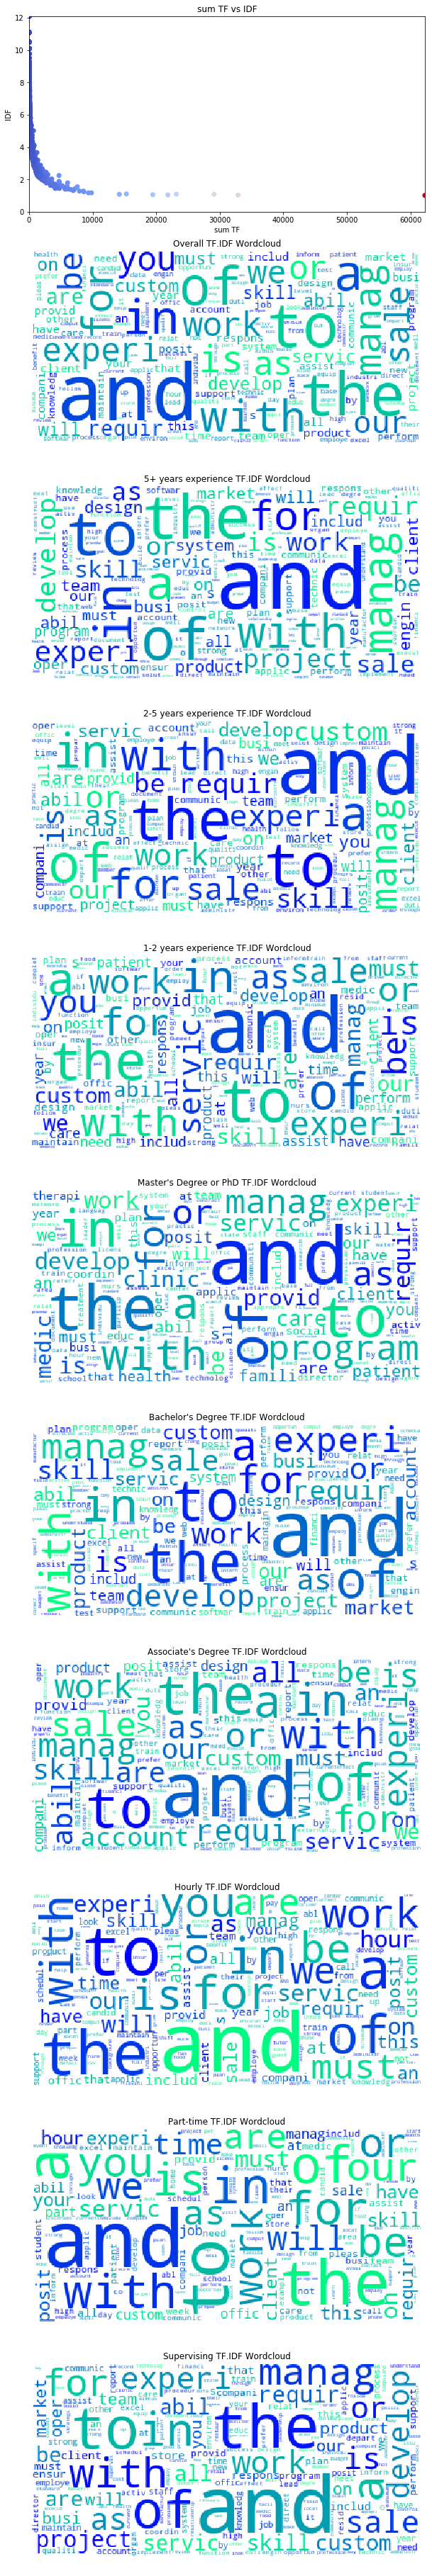

In [13]:
analyze(jobs_df, 'stems', segments)

generating plot 1 / 11
generating plot 2 / 11
generating plot 3 / 11
generating plot 4 / 11
generating plot 5 / 11
generating plot 6 / 11
generating plot 7 / 11
generating plot 8 / 11
generating plot 9 / 11
generating plot 10 / 11
generating plot 11 / 11

('Number of terms: ', 18286)


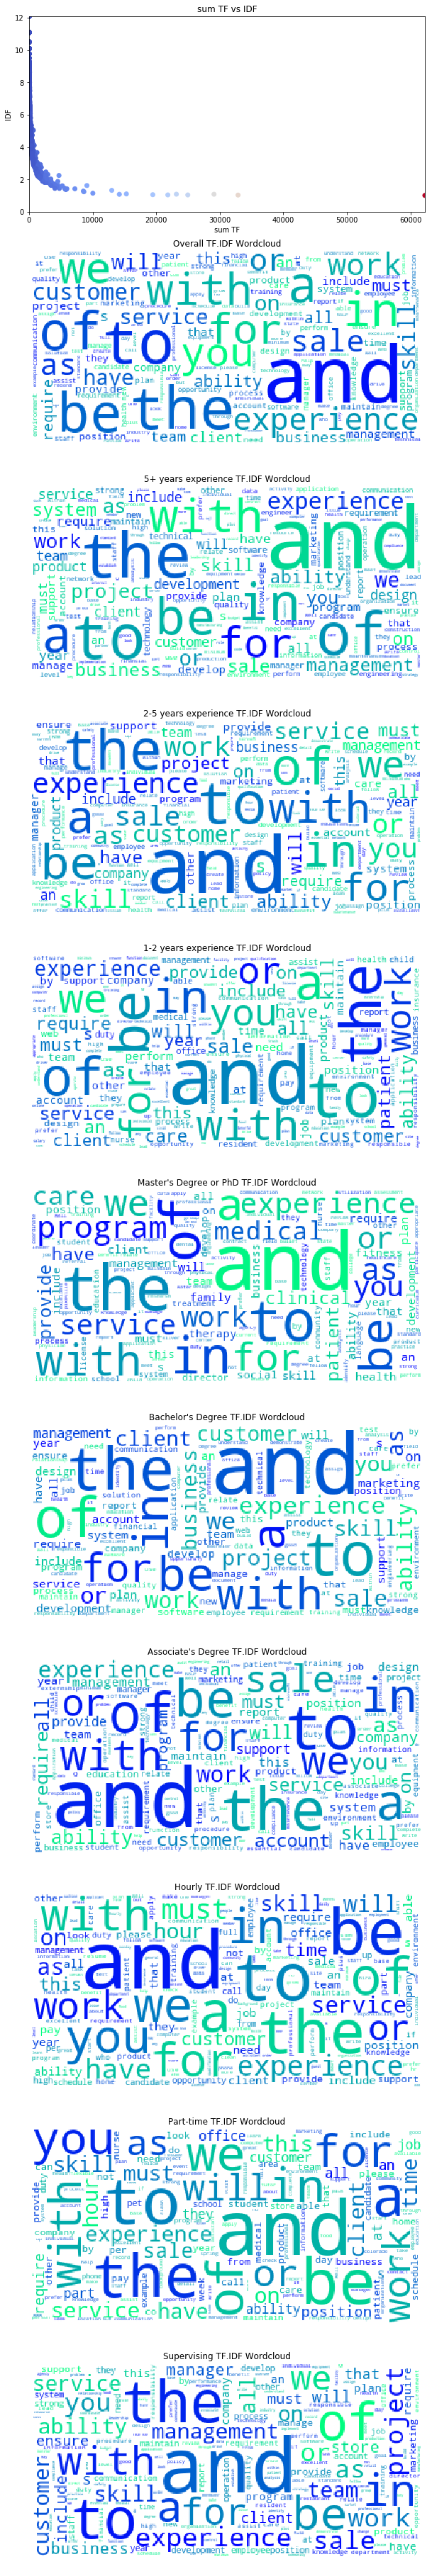

In [14]:
analyze(jobs_df, 'lemmas', segments)

Now, let's save off our work.

In [15]:
save_fun(stem, imports=['nltk'], stemmer=stemmer)

In [16]:
save_fun(lemmatize, english_lemmas=english_lemmas)

In [17]:
jobs_df.to_pickle('./data/lemmatized.pickle')

We see more interesting words than before, but "and", "to", "the" still seem to dominate. We need some way of removing these troublesome words.

### NEXT => [5. Stop Words](5. Stop Words.ipynb)